# Machine Learning - 2😍😍

## Minakov Nikita / CSSE1707-DA3/ 2020
## Lab #2 Knn

### Welcome to my diamonds analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

#### Import the dataset

In [2]:
dataset = pd.read_csv('diamonds.csv', )

In [3]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dataset.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


___________________________________________

 ### I will use only Ideal and Very good cut's of diamnond. Unneeded will be dropped

In [8]:
dataset.cut.value_counts().sort_index()

Ideal        21551
Very Good    12082
Name: cut, dtype: int64

In [7]:
dataset = dataset[dataset.cut!='Fair'] 
dataset = dataset[dataset.cut!='Good'] 
dataset = dataset[dataset.cut!='Premium'] 

In [9]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


'Very Good': 0, 
'Ideal': 1

In [10]:
mapping = {'Very Good': 0, 'Ideal': 1}
dataset = dataset.replace({'cut': mapping})

__________________


#### Preparation of dataset

In [11]:
X = dataset.loc[:,['carat','depth', 'table', 'price', 'x', 'y', 'z']].values

In [12]:
X

array([[ 0.23, 61.5 , 55.  , ...,  3.95,  3.98,  2.43],
       [ 0.24, 62.8 , 57.  , ...,  3.94,  3.96,  2.48],
       [ 0.24, 62.3 , 57.  , ...,  3.95,  3.98,  2.47],
       ...,
       [ 0.72, 60.8 , 57.  , ...,  5.75,  5.76,  3.5 ],
       [ 0.7 , 62.8 , 60.  , ...,  5.66,  5.68,  3.56],
       [ 0.75, 62.2 , 55.  , ...,  5.83,  5.87,  3.64]])

In [13]:
len(X)

33633

In [14]:
y = dataset.iloc[:,2].values

In [15]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
len(y)

33633

________________________________________________________

In [17]:
X

array([[ 0.23, 61.5 , 55.  , ...,  3.95,  3.98,  2.43],
       [ 0.24, 62.8 , 57.  , ...,  3.94,  3.96,  2.48],
       [ 0.24, 62.3 , 57.  , ...,  3.95,  3.98,  2.47],
       ...,
       [ 0.72, 60.8 , 57.  , ...,  5.75,  5.76,  3.5 ],
       [ 0.7 , 62.8 , 60.  , ...,  5.66,  5.68,  3.56],
       [ 0.75, 62.2 , 55.  , ...,  5.83,  5.87,  3.64]])

In [20]:
from sklearn.preprocessing import LabelEncoder

labelEncoderY = LabelEncoder()
y = labelEncoderY.fit_transform(y)
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

________________________________________________________________________________________


#### Spliting the dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [23]:
X_train.shape

(26906, 7)

In [24]:
X_test.shape

(6727, 7)

In [25]:
y_train.shape

(26906,)

In [26]:
y_test.shape

(6727,)

In [27]:
import seaborn as sns

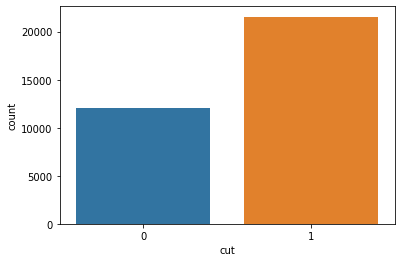

In [28]:
sns.countplot(dataset.cut)

Not crirtical difference for my 'y' values column 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_cls = KNeighborsClassifier()

In [31]:
knn_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_preds = knn_cls.predict(X_test)

In [33]:
for i, j in zip(y_test, y_preds):
    print(i, ":" ,j)

0 : 1
0 : 1
1 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
0 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 0
0 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 0
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 1
0 : 0
1 : 0
1 : 0
0 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 1
1 : 1
1 : 0
1 : 1
1 : 0
1 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 

0 : 1
1 : 1
0 : 0
1 : 0
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 0
0 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
0 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 0
0 : 1
0 : 1
0 : 0
0 : 1
1 : 1
0 : 0
0 : 1
0 : 0
0 : 1
0 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 0
0 : 0
0 : 1
1 : 1
0 : 0
0 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 0
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 0
1 : 1
0 : 

0 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
0 : 1
0 : 1
1 : 1
0 : 0
0 : 0
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
0 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 0
0 : 1
0 : 0
1 : 1
0 : 1
0 : 0
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
0 : 1
1 : 0
0 : 0
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 0
0 : 0
0 : 1
1 : 1
0 : 0
1 : 

0 : 1
1 : 1
0 : 0
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 0
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
1 : 0
1 : 0
0 : 1
0 : 1
0 : 1
0 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
0 : 1
0 : 0
0 : 1
0 : 1
1 : 1
1 : 1
0 : 0
0 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
0 : 0
1 : 0
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 1
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
0 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [35]:
accuracy_score(y_test, y_preds)

0.7327188940092166

In [36]:
confusion_matrix(y_test, y_preds)

array([[1124, 1293],
       [ 505, 3805]], dtype=int64)

In [37]:
precision_score(y_test, y_preds)

0.7463711259317379

In [38]:
recall_score(y_test, y_preds)

0.882830626450116

In [39]:
print(classification_report(y_test, y_preds, target_names=['Very Good','Ideal']))

              precision    recall  f1-score   support

   Very Good       0.69      0.47      0.56      2417
       Ideal       0.75      0.88      0.81      4310

    accuracy                           0.73      6727
   macro avg       0.72      0.67      0.68      6727
weighted avg       0.73      0.73      0.72      6727



In [40]:
2* ((0.75*0.88)/(0.75+0.88))

0.8098159509202455

In [41]:
2* ((0.69*0.47)/(0.69+0.47))

0.5591379310344827

As a result of the analysis and the construction of the model, the result obtained is not bad enough to predict what type Diamond belongs to by its input parameters.

The prediction of a ideal diamond is more accurate than very good.

_________________________________________________________________________________

 ## LogReg algorithm 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results and calculating the accuracy

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1152 1228]
 [ 250 4097]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.48      0.61      2380
           1       0.77      0.94      0.85      4347

    accuracy                           0.78      6727
   macro avg       0.80      0.71      0.73      6727
weighted avg       0.79      0.78      0.76      6727



### ROC Curve

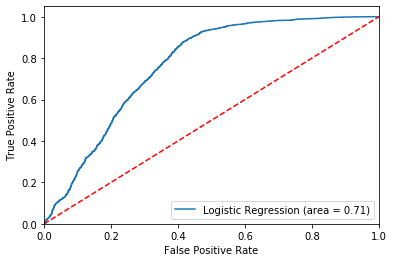

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()